# 趨勢、位階、型態（３）

## 程式實作：人工方式標註空翻多過程，以瞭解多空之間的各種現象及其特徵

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

In [2]:
##### 使用2019年7月15日到2019年1月30日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day19.xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

In [3]:
def date_to_index(df_in,date_in) :
    number_array = df_in.index == date_in
    idx = 0
    for number_index in number_array :
        if number_index == True :
            break
        idx = idx + 1
    return idx

#### 多頭確立

In [4]:
### 人工方式標示多頭確立 ###
# 方法一：道氏理論 N字型的現象：低點越來越高，高點越來越高
bulls_dow_points_len = len(np.array(df_k_line['Close']))
bulls_dow_points = np.array([np.nan]*bulls_dow_points_len)
idx = date_to_index(df_k_line,'2019-08-06')
bulls_dow_points[idx] = df_k_line.iloc[idx]['Open']
idx = date_to_index(df_k_line,'2019-08-26')
bulls_dow_points[idx] = df_k_line.iloc[idx]['Close']
idx = date_to_index(df_k_line,'2019-08-08')
bulls_dow_points[idx] = df_k_line.iloc[idx]['Close']
idx = date_to_index(df_k_line,'2019-08-22')
bulls_dow_points[idx] = df_k_line.iloc[idx]['Open']
# 方法二：移動平均線理論 20日線站上且20日線上揚
bulls_ma20_points_len = len(np.array(df_k_line['Close']))
bulls_ma20_points = np.array([np.nan]*bulls_ma20_points_len)
idx = date_to_index(df_k_line,'2019-08-30')
bulls_ma20_points[idx] = df_k_line.iloc[idx]['Open']

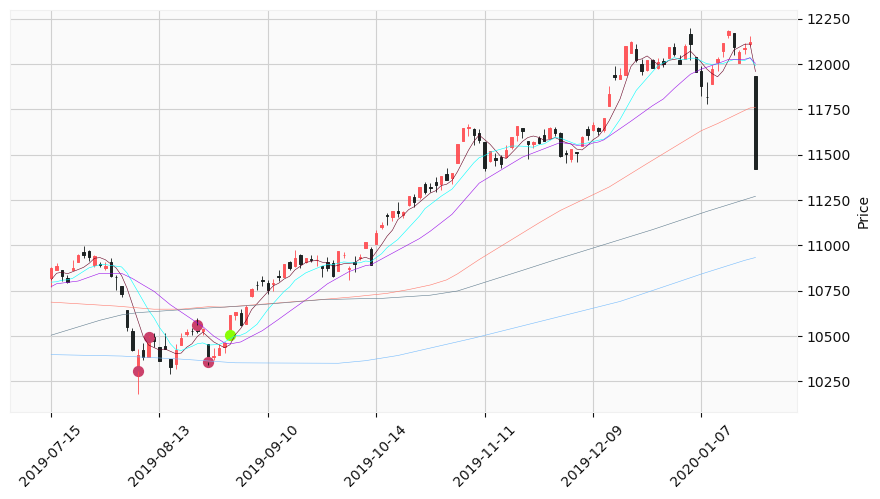

In [5]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定多頭確立點與移動平均線
added_plots={
    "DOW": mpf.make_addplot(bulls_dow_points,type='scatter',marker='o',markersize=50,color='xkcd:dark pink'),
    "MA20": mpf.make_addplot(bulls_ma20_points,type='scatter',marker='o',markersize=50,color='xkcd:lime green'),
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 多頭起漲

In [6]:
### 人工方式標示多頭起漲 ###
start_rise_points_len = len(np.array(df_k_line['Close']))
start_rise_points = np.array([np.nan]*start_rise_points_len)
# 起漲就是最低的三個點位：
# 第一個：最低點 
idx = date_to_index(df_k_line,'2019-08-06')
start_rise_points[idx] = df_k_line.iloc[idx]['Close']
# 第二個：上漲回檔再續漲
idx = date_to_index(df_k_line,'2019-08-30')
start_rise_points[idx] = df_k_line.iloc[idx]['Close']
# 第三個：出現迷你底型或盤整區間突破
idx = date_to_index(df_k_line,'2019-09-04')
start_rise_points[idx] = df_k_line.iloc[idx]['Close']

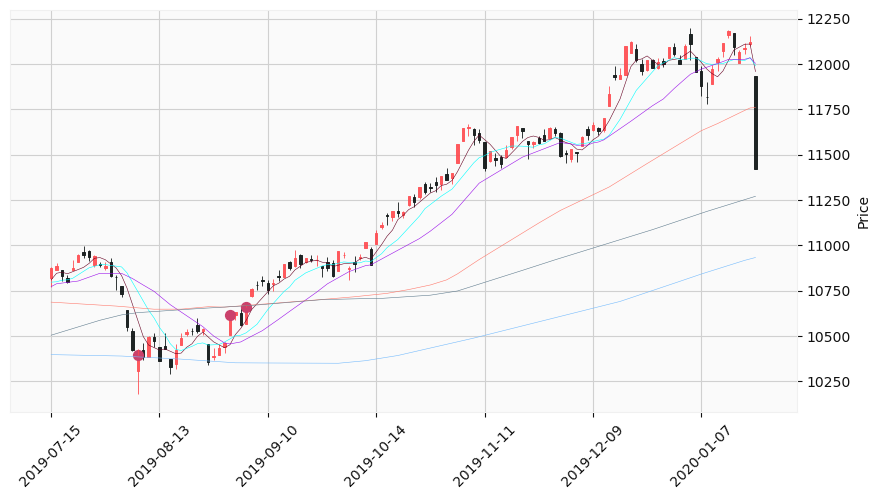

In [7]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定多頭起漲點與移動平均線
added_plots={
    "START": mpf.make_addplot(start_rise_points,type='scatter',marker='o',markersize=50,color='xkcd:dark pink'),
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()) ,datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 多頭回檔

In [8]:
### 多頭回檔 ###

range_lines = []
# 範圍一
corner1 = ('2019-08-22',df_k_line.loc['2019-08-22']['Open'])
corner2 = ('2019-08-28',df_k_line.loc['2019-08-22']['Open'])
corner3 = ('2019-08-22',df_k_line.loc['2019-08-27']['Close'])
corner4 = ('2019-08-28',df_k_line.loc['2019-08-27']['Close'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍二
corner1 = ('2019-11-06',df_k_line.loc['2019-11-06']['Open'])
corner2 = ('2019-11-15',df_k_line.loc['2019-11-06']['Open'])
corner3 = ('2019-11-06',df_k_line.loc['2019-11-11']['Close'])
corner4 = ('2019-11-15',df_k_line.loc['2019-11-11']['Close'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])


# 範圍三
corner1 = ('2019-11-27',df_k_line.loc['2019-11-27']['Close'])
corner2 = ('2019-12-04',df_k_line.loc['2019-11-27']['Close'])
corner3 = ('2019-11-27',df_k_line.loc['2019-12-03']['Open'])
corner4 = ('2019-12-04',df_k_line.loc['2019-12-03']['Open'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍四
corner1 = ('2020-01-02',df_k_line.loc['2020-01-02']['Close'])
corner2 = ('2020-01-09',df_k_line.loc['2020-01-02']['Close'])
corner3 = ('2020-01-02',df_k_line.loc['2020-01-09']['Open'])
corner4 = ('2020-01-09',df_k_line.loc['2020-01-09']['Open'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

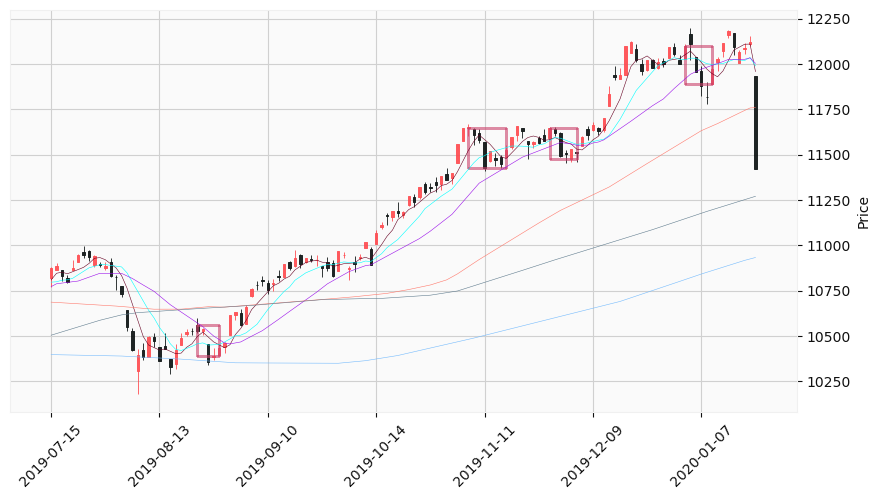

In [9]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定範圍
seq_of_seq_of_points=range_lines

# 設定移動平均線
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=1, colors='xkcd:dark pink', alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 多頭續漲

In [10]:
### 多頭續漲 ###

range_lines = []
# 範圍一
corner1 = ('2019-08-15',df_k_line.loc['2019-08-15']['Close'])
corner2 = ('2019-08-22',df_k_line.loc['2019-08-15']['Close'])
corner3 = ('2019-08-15',df_k_line.loc['2019-08-22']['Open'])
corner4 = ('2019-08-22',df_k_line.loc['2019-08-22']['Open'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍二
corner1 = ('2019-08-26',df_k_line.loc['2019-08-26']['Close'])
corner2 = ('2019-09-19',df_k_line.loc['2019-08-26']['Close'])
corner3 = ('2019-08-26',df_k_line.loc['2019-09-19']['Open'])
corner4 = ('2019-09-19',df_k_line.loc['2019-09-19']['Open'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍三
corner1 = ('2019-10-03',df_k_line.loc['2019-10-03']['Open'])
corner2 = ('2019-11-06',df_k_line.loc['2019-10-03']['Open'])
corner3 = ('2019-10-03',df_k_line.loc['2019-11-06']['Close'])
corner4 = ('2019-11-06',df_k_line.loc['2019-11-06']['Close'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍四
corner1 = ('2019-11-13',df_k_line.loc['2019-11-14']['Close'])
corner2 = ('2019-11-20',df_k_line.loc['2019-11-14']['Close'])
corner3 = ('2019-11-13',df_k_line.loc['2019-11-19']['Close'])
corner4 = ('2019-11-20',df_k_line.loc['2019-11-19']['Close'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍五
corner1 = ('2019-12-03',df_k_line.loc['2019-12-03']['Open'])
corner2 = ('2019-12-18',df_k_line.loc['2019-12-03']['Open'])
corner3 = ('2019-12-03',df_k_line.loc['2019-12-18']['Close'])
corner4 = ('2019-12-18',df_k_line.loc['2019-12-18']['Close'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

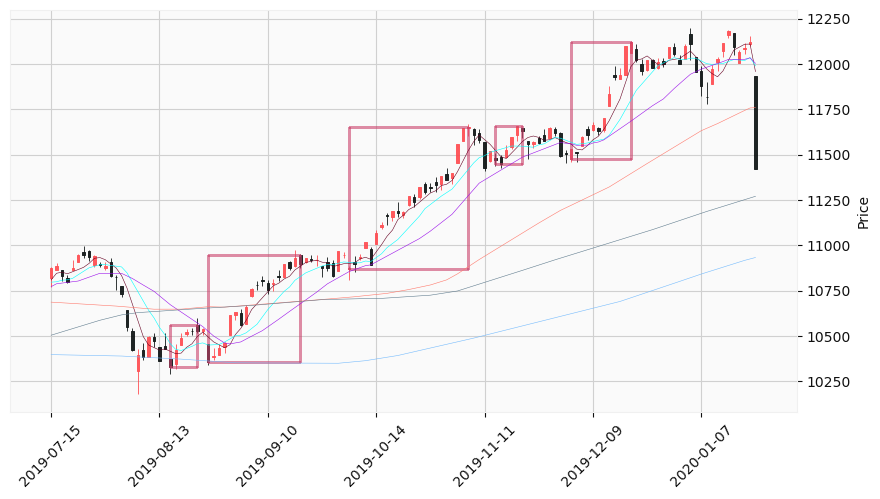

In [11]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定範圍
seq_of_seq_of_points=range_lines

# 設定移動平均線
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=1, colors='xkcd:dark pink', alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 多頭盤整

In [12]:
### 多頭盤整 ###

range_lines = []
# 範圍一
corner1 = ('2019-09-12',df_k_line.loc['2019-10-01']['Close'])
corner2 = ('2019-10-08',df_k_line.loc['2019-10-01']['Close'])
corner3 = ('2019-09-12',df_k_line.loc['2019-09-16']['Open'])
corner4 = ('2019-10-08',df_k_line.loc['2019-09-16']['Open'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍二
corner1 = ('2019-11-05',df_k_line.loc['2019-12-09']['Close'])
corner2 = ('2019-12-11',df_k_line.loc['2019-12-09']['Close'])
corner3 = ('2019-11-05',df_k_line.loc['2019-11-11']['Close'])
corner4 = ('2019-12-11',df_k_line.loc['2019-11-11']['Close'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍三
corner1 = ('2019-12-13',df_k_line.loc['2020-01-03']['Open'])
corner2 = ('2020-01-30',df_k_line.loc['2020-01-03']['Open'])
corner3 = ('2019-12-13',df_k_line.loc['2020-01-07']['Close'])
corner4 = ('2020-01-30',df_k_line.loc['2020-01-07']['Close'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

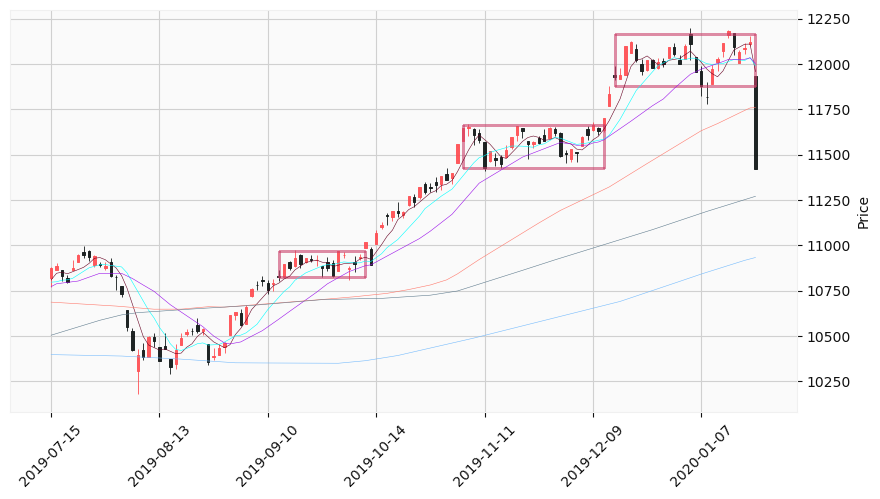

In [13]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定範圍
seq_of_seq_of_points=range_lines

# 設定移動平均線
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=1, colors='xkcd:dark pink', alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 多頭止漲

In [14]:
### 人工方式標示多頭止漲 ###
stop_rise_points_len = len(np.array(df_k_line['Close']))
stop_rise_points = np.array([np.nan]*stop_rise_points_len)

# 最高點
idx = date_to_index(df_k_line,'2020-01-03')
stop_rise_points[idx] = df_k_line.iloc[idx]['Open']

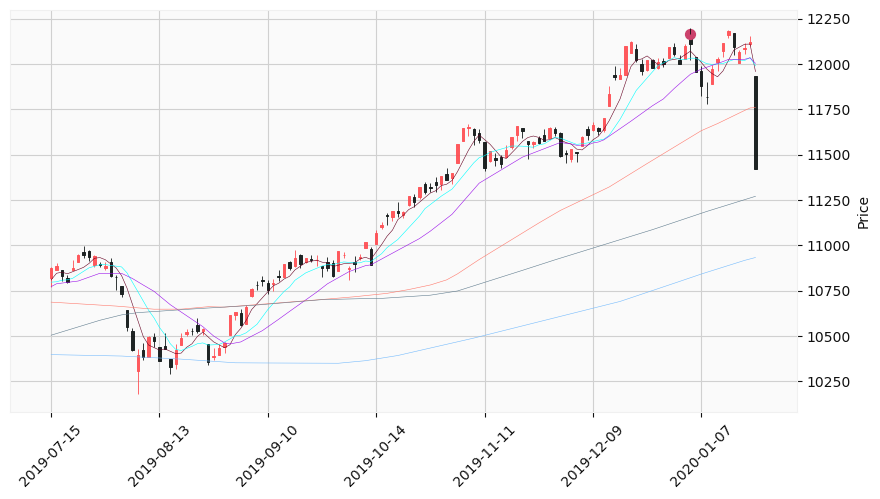

In [15]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線
added_plots={
    "STOP": mpf.make_addplot(stop_rise_points,type='scatter',marker='o',markersize=50,color='xkcd:dark pink'),
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 多頭盤頭 與 空頭做頭

In [16]:
### 多頭盤頭 與 空頭做頭 ####

range_lines = []
# 頭部範圍
corner1 = ('2019-12-13',df_k_line.loc['2020-01-03']['Open'])
corner2 = ('2020-01-30',df_k_line.loc['2020-01-03']['Open'])
corner3 = ('2019-12-13',df_k_line.loc['2020-01-07']['Close'])
corner4 = ('2020-01-30',df_k_line.loc['2020-01-07']['Close'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 跌破點
breakthrough_points_len = len(np.array(df_k_line['Close']))
breakthrough_points = np.array([np.nan]*breakthrough_points_len)
breakthrough_points[date_to_index(df_k_line,'2020-01-30')] = df_k_line.loc['2020-01-07']['Close']

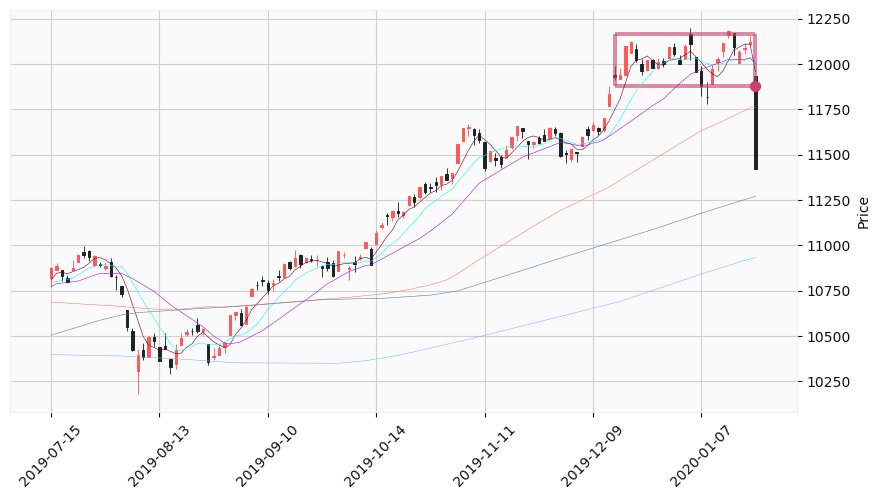

In [17]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定與頸線
seq_of_seq_of_points=range_lines

# 設定跌破點與移動平均線
added_plots={
    "BREAKTHROUGH": mpf.make_addplot(breakthrough_points,type='scatter',marker='o',markersize=50,color='xkcd:dark pink'),
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=1.5, colors='xkcd:dark pink', alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)